# import libraray 

In [1]:
import pandas as  pd 
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#reading the data

Players_info= pd.read_csv("Fifa_Players.csv")

/var/folders/pd/vwqlxmsj1g79wbmb63_1mgnm0000gn/T/ipykernel_1124/30296707.py:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  Players_info= pd.read_csv("Fifa_Players.csv")


In [3]:
Players_info.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
Players_features = pd.DataFrame(pd.read_csv("Fifa_Players.csv" , usecols =["overall" , "potential" , "value_eur", "wage_eur" , "age"]))

In [5]:
Players_features.head()

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30


In [6]:
Players_features.describe()

,overall,potential,value_eur,wage_eur,age
count,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000
mean,65.772182,71.079370,2.850452e+06,9017.989363,25.210822
std,6.880232,6.086213,7.613700e+06,19470.176724,4.748235
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,54.000000


# remove whole blanks

In [7]:
Players_features=Players_features.dropna()

In [8]:
Players_features.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,1.916500e+04,19165.000000,19165.000000
mean,65.760188,71.079990,2.850452e+06,9021.721889,25.190034
std,6.882803,6.087721,7.613700e+06,19476.005074,4.727515
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,43.000000


# allocate equal value 

## (value-mean)/sd

In [9]:
scaler = StandardScaler()

In [10]:
Players_features_sc = scaler.fit_transform(Players_features)

In [11]:
Players_features_sc

array([[ 3.95776568,  3.60078658,  9.87056351, 15.96766844,  1.86359972],
       [ 3.81247225,  3.4365172 , 15.32140647, 13.40033986,  1.44053345],
       [ 3.66717883,  3.27224782,  5.53615826, 13.40033986,  2.28666598],
       ...,
       [-2.725732  , -2.64144996, -0.36125978, -0.4375612 , -0.886331  ],
       [-2.725732  , -1.82010304, -0.35994632, -0.4375612 , -1.30939726],
       [-2.725732  , -1.82010304, -0.35994632, -0.4375612 , -1.30939726]])

# create function (for elbow plot )

In [22]:
def best_K_means(data, k_max):
    means = []
    inertia = []

    for k in range(1, k_max):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertia.append(kmeans.inertia_)

    # Elbow plot
    plt.figure(figsize=(12, 5))
    plt.plot(means, inertia, "o-")
    plt.xlabel("K value")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()


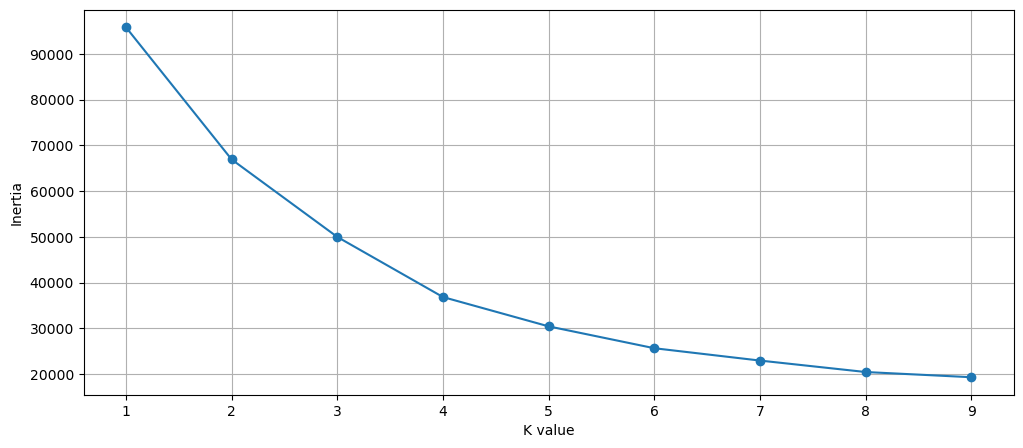

In [23]:
best_K_means(Players_features_sc,10)

In [24]:
kmeans =KMeans(n_clusters = 3)

# data fit 

In [25]:
kmeans.fit(Players_features_sc)

KMeans(n_clusters=3)

In [26]:
Players_features.insert (5,"K3",kmeans.labels_)

In [27]:
Players_features

,overall,potential,value_eur,wage_eur,age,K3
0,93,93,78000000.0,320000.0,34,1
1,92,92,119500000.0,270000.0,32,1
2,91,91,45000000.0,270000.0,36,1
3,91,91,129000000.0,270000.0,29,1
4,91,91,125500000.0,350000.0,30,1
...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,0
19235,47,59,110000.0,500.0,19,0
19236,47,55,100000.0,500.0,21,0
19237,47,60,110000.0,500.0,19,0


In [29]:
Players_features.head(15)

,overall,potential,value_eur,wage_eur,age,K3
0,93,93,78000000.0,320000.0,34,1
1,92,92,119500000.0,270000.0,32,1
2,91,91,45000000.0,270000.0,36,1
3,91,91,129000000.0,270000.0,29,1
4,91,91,125500000.0,350000.0,30,1
5,91,93,112000000.0,130000.0,28,1
6,91,95,194000000.0,230000.0,22,1
7,90,90,13500000.0,86000.0,35,1
8,90,92,99000000.0,250000.0,29,1
9,90,90,129500000.0,240000.0,27,1


# scatter plot

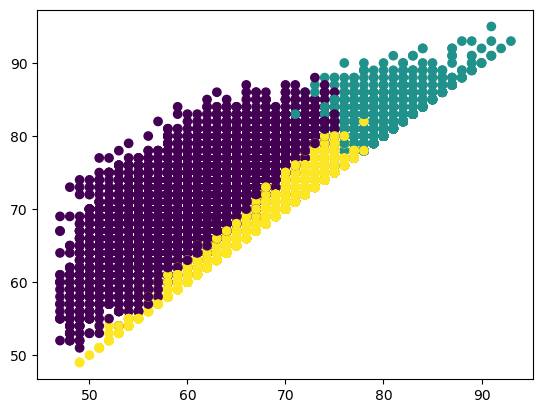

In [30]:
plt.scatter(x = Players_features["overall"] , y=Players_features["potential"], c = Players_features["K3"])
plt.show()

# we can assume 2 type players (k=2)

In [33]:
kmeans =KMeans(n_clusters = 2)
kmeans.fit(Players_features_sc)
Players_features.insert (6,"K2",kmeans.labels_)
Players_features

,overall,potential,value_eur,wage_eur,age,K3,K2
0,93,93,78000000.0,320000.0,34,1,1
1,92,92,119500000.0,270000.0,32,1,1
2,91,91,45000000.0,270000.0,36,1,1
3,91,91,129000000.0,270000.0,29,1,1
4,91,91,125500000.0,350000.0,30,1,1
...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,0,0
19235,47,59,110000.0,500.0,19,0,0
19236,47,55,100000.0,500.0,21,0,0
19237,47,60,110000.0,500.0,19,0,0


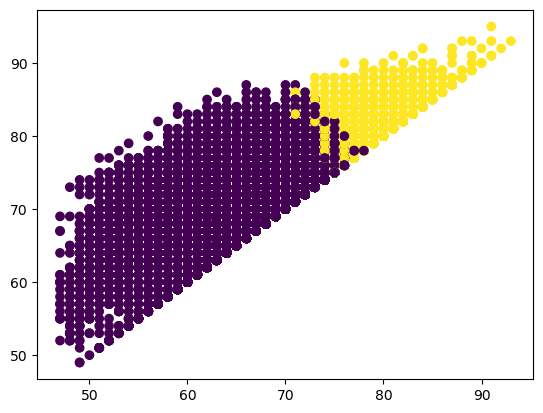

In [35]:
plt.scatter(x = Players_features["overall"] , y=Players_features["potential"], c = Players_features["K2"])
plt.show()

In [36]:
from sklearn.cluster import KMeans

import joblib

model = kmeans.fit(Players_features_sc)


joblib.dump(model, "Players_info_Identifier")



['Players_info_Identifier']